<a href="https://colab.research.google.com/github/manasik29/Multi_Linear_Regression/blob/main/Multi_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd


***Load Data***

In [4]:
data = pd.read_csv('/content/Cars.csv')

In [ ]:
data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [ ]:
#check for missing values
data.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [ ]:
data[data.duplicated()].shape

(0, 5)

***Correlation Matrix***

In [ ]:
data.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


***Scatter Plot between variables along with histograms***

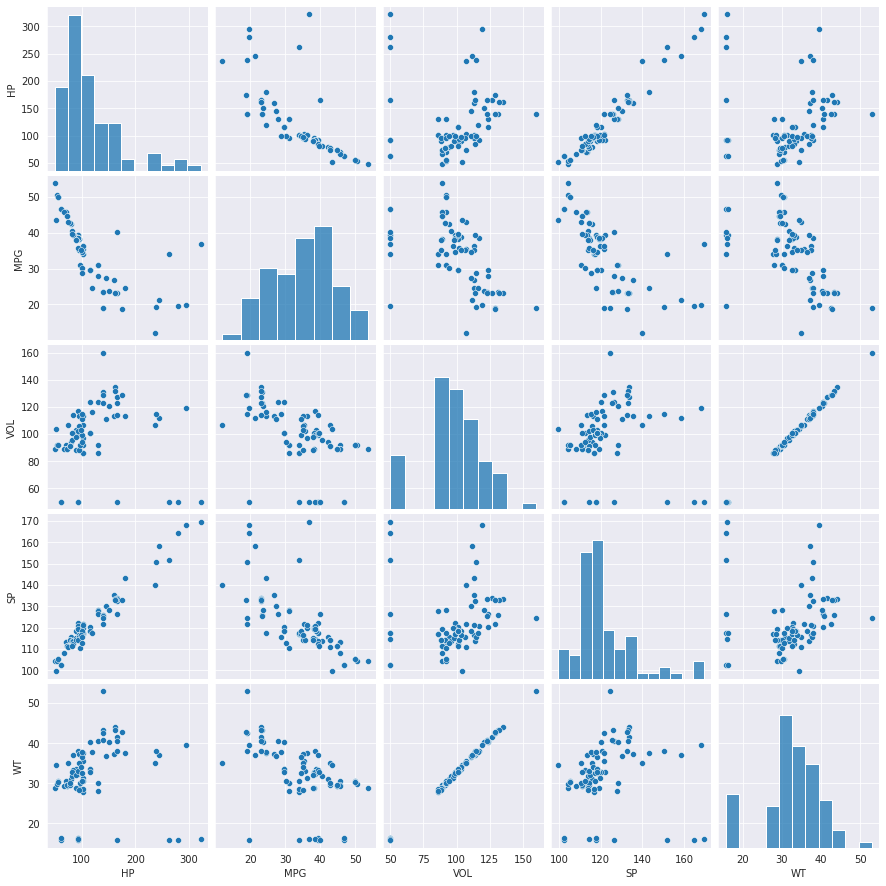

In [ ]:
#Scatter plot
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(data)

***Preparing a Model***

In [14]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [27]:
model = smf.ols('MPG~WT+VOL+HP+SP', data).fit()

In [ ]:
#Coefficients
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
HP           -0.205444
SP            0.395627
dtype: float64

In [ ]:
#t-values & p-values
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
HP          -5.238735
SP           2.499880
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
HP           0.000001
SP           0.014579
dtype: float64


In [ ]:
#R squared values
(model.rsquared, model.rsquared_adj)

(0.7705372737359844, 0.7584602881431415)

***Simple Linear Regression Model***  - to detect multi colinearity problem

In [ ]:
#Simple Linear Regression with only volume
ml_v = smf.ols('MPG~VOL', data = data).fit()

In [ ]:
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [ ]:
#Simple Linear Regression with only weight
ml_w = smf.ols('MPG~WT', data = data).fit()

In [ ]:
print(ml_w.tvalues, ml_w.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [ ]:
#Simple Linear Regression with volume and weight
ml_v_w = smf.ols('MPG~VOL+WT', data=data).fit()

In [ ]:
print(ml_v_w.tvalues, ml_v_w.pvalues)

Intercept    12.545736
VOL          -0.709604
WT            0.489876
dtype: float64 Intercept    2.141975e-20
VOL          4.800657e-01
WT           6.255966e-01
dtype: float64


In [ ]:
#calculate VIF to detect colinearity
rsq_hp = smf.ols('HP~VOL+WT+SP', data = data).fit().rsquared
vif_hp = 1/(1-rsq_hp)

rsq_vol = smf.ols('VOL~HP+WT+SP', data = data).fit().rsquared
vif_vol = 1/(1-rsq_vol)

rsq_wt = smf.ols('WT~VOL+HP+SP', data = data).fit().rsquared
vif_wt = 1/(1-rsq_wt)

rsq_sp = smf.ols('SP~VOL+WT+HP', data = data).fit().rsquared
vif_sp = 1/(1-rsq_sp)

#Storing vif values in dataframe
d1 = {'Variables':['HP', 'VOL', 'WT', 'SP'], 'VIF':[vif_hp, vif_vol, vif_wt, vif_sp]}
vif_frame = pd.DataFrame(d1)
vif_frame

,Variables,VIF
0,HP,19.926589
1,VOL,638.806084
2,WT,639.533818
3,SP,20.007639


***Residual Analysis***

Test for Normality of Residuals - Q-Q plot

In [24]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

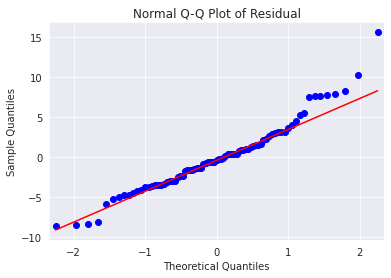

In [ ]:
#q line is the 45 degrees line
qqplot = sm.qqplot(model.resid, line= 'q')
plt.title('Normal Q-Q Plot of Residual')
plt.show()

In [28]:
import numpy as np
list(np.where(model.resid>10))

[array([ 0, 76])]

Residual Plot for Homoscedasticity

In [ ]:
def get_standardize_values( vals): 
  return (vals - vals.mean())/vals.std() # get standardized values of fitted values and residual

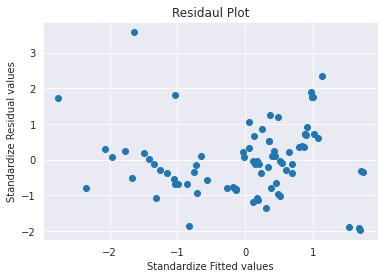

In [ ]:
plt.scatter(get_standardize_values(model.fittedvalues), get_standardize_values(model.resid))
plt.ylabel('Standardize Residual values')
plt.xlabel('Standardize Fitted values')
plt.title('Residaul Plot')
plt.show()

Residual vs Regressors

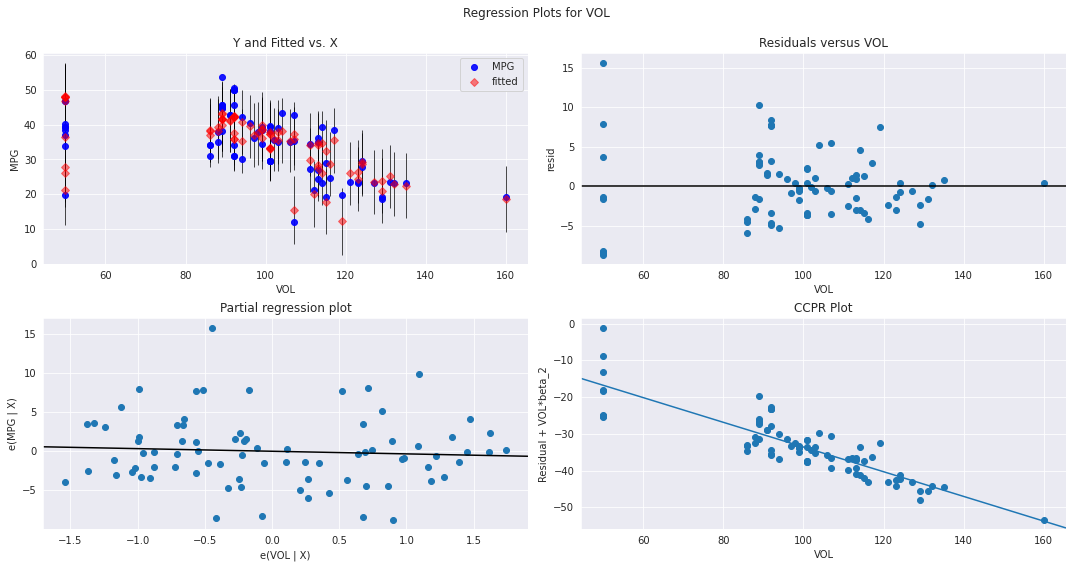

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'VOL', fig=fig)
plt.show()                                  

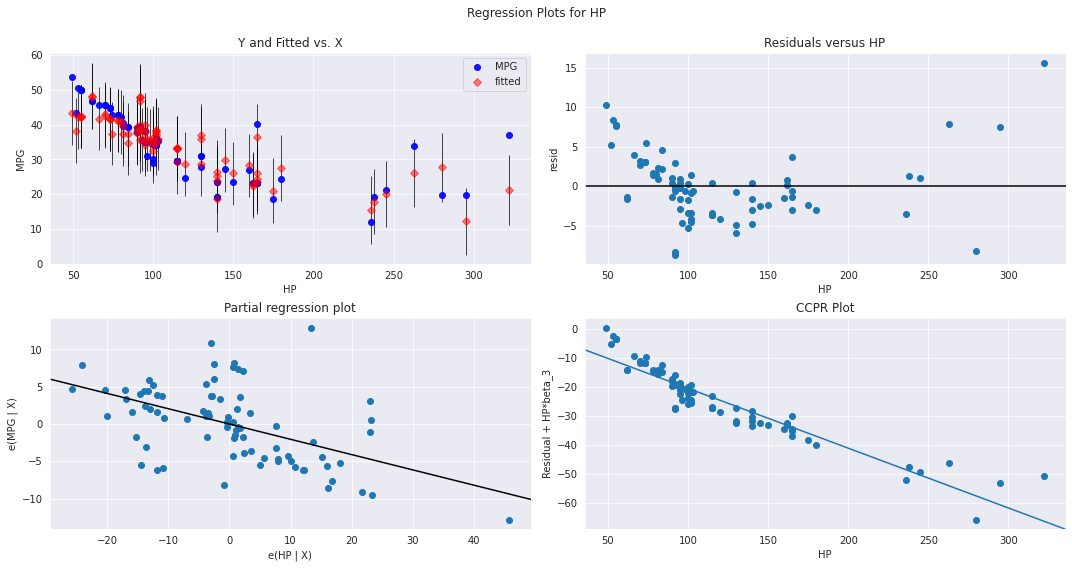

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'HP', fig=fig)
plt.show()

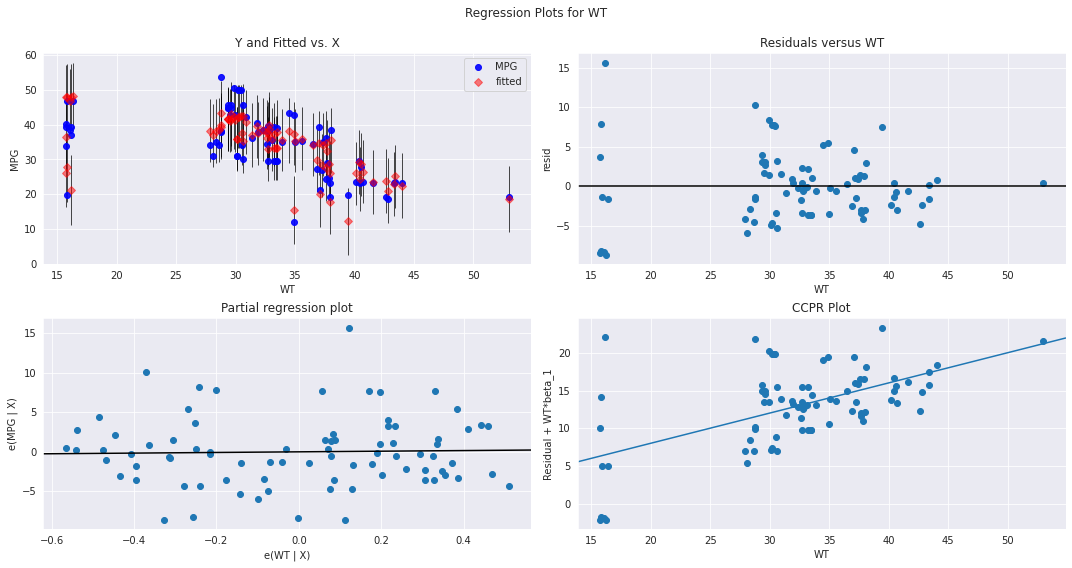

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'WT', fig=fig)
plt.show()

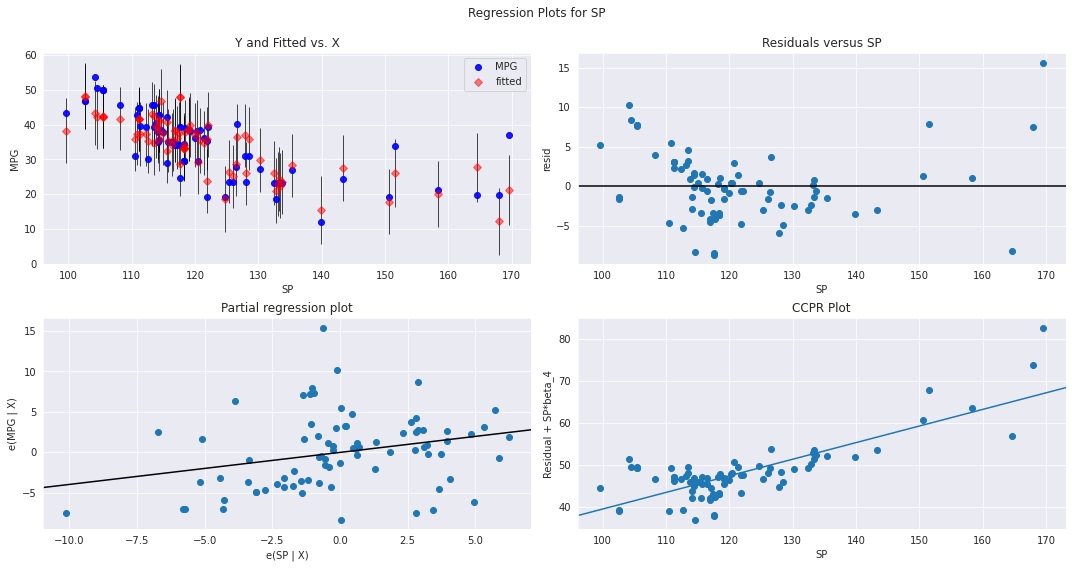

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'SP', fig=fig)
plt.show()

***Model Deletion***

Detecting outliers/Influencers

Cooks Distance

In [ ]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


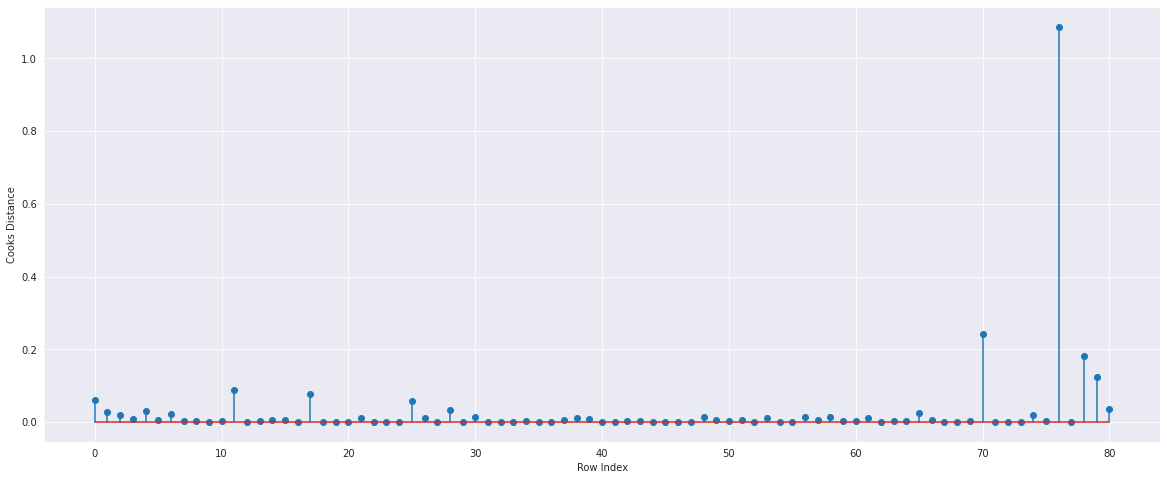

In [ ]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(data)), np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and values of influencers where c is more than .5
(np.argmax(c), np.max(c))

(76, 1.0865193998179927)

High Influence Points

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

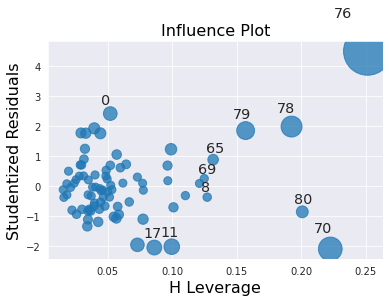

In [ ]:
influence_plot(model)
plt.show()

In [5]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*(k+1)/n

In [6]:
leverage_cutoff

0.2222222222222222

From teh above plot it is evident that 70 and 76 datpoint are influencers

In [7]:
data[data.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


Compare other data with the influencers data.

In [8]:
data.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


***Deleting the influencers***

In [10]:
#delete the influencers point and reassign teh row numbers
cars1 = data.drop(data.index[[70,76]], axis=0).reset_index()

In [11]:
cars1

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
74,75,175,18.762837,129,132.864163,42.778219
75,77,238,19.197888,115,150.576579,37.923113
76,78,263,34.000000,50,151.598513,15.769625
77,79,295,19.833733,119,167.944460,39.423099


In [12]:
cars1 = cars1.drop(['index'], axis=1)

In [13]:
cars1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


***Build Model***

In [18]:
#Exclude variable'WT' from the model
final_ml_v = smf.ols('MPG~VOL+HP+SP', data=cars1).fit()

In [19]:
#get R squared and AIC values
(final_ml_v.rsquared, final_ml_v.aic)

(0.8161692010376007, 446.11722639447726)

In [20]:
#Exclude variable'VOl' from the model
final_ml_w = smf.ols('MPG~WT+HP+SP', data=cars1).fit()

In [21]:
#get R squared and AIC values
(final_ml_w.rsquared, final_ml_w.aic)

(0.8160034320495305, 446.1884323575031)

From above we can conclude that final_ml_w has slightly higher r squared value and little lower aic values so we will include variable "VOL" to eliminate multi-colinearity problem.

Cook's Distance

In [31]:
model_influence_v = final_ml_v.get_influence()
(c_V, _) = model_influence_v.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


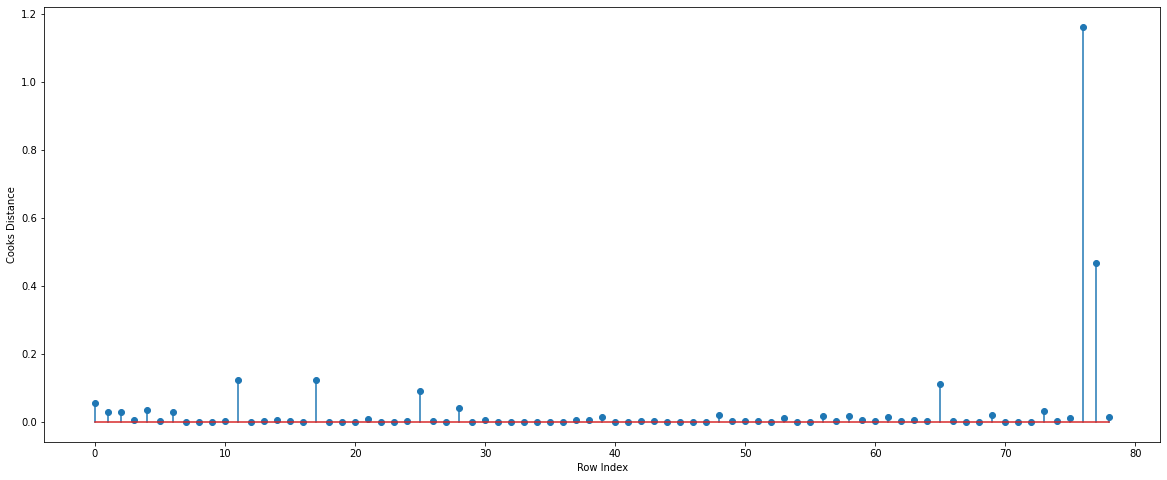

In [32]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(cars1)), np.round(c_V,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [52]:
#index and values of influencers where c is more than .5
(np.argmax(c_V), np.max(c_V))

(76, 1.162938746913523)

In [43]:
#delete the influencers point and reassign the row numbers
cars2 = cars1.drop(cars1.index[[76,77]], axis=0)

In [44]:
cars3 = cars2.reset_index()

In [45]:
cars3

,index,HP,MPG,VOL,SP,WT
0,0,49,53.700681,89,104.185353,28.762059
1,1,55,50.013401,92,105.461264,30.466833
2,2,55,50.013401,92,105.461264,30.193597
3,3,70,45.696322,92,113.461264,30.632114
4,4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...,...
72,72,140,19.086341,160,124.715241,52.997752
73,73,140,19.086341,129,121.864163,42.618698
74,74,175,18.762837,129,132.864163,42.778219
75,75,238,19.197888,115,150.576579,37.923113


In [46]:
cars4 = cars3.drop(['index'], axis=1)

In [48]:
cars4

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
72,140,19.086341,160,124.715241,52.997752
73,140,19.086341,129,121.864163,42.618698
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113


In [49]:
#Build the model on new data
final_ml_V = smf.ols('MPG~VOL+HP+SP', data = cars4).fit()

In [50]:
model_influence_V = final_ml_V.get_influence()
(c_v, _) = model_influence_V.cooks_distance

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


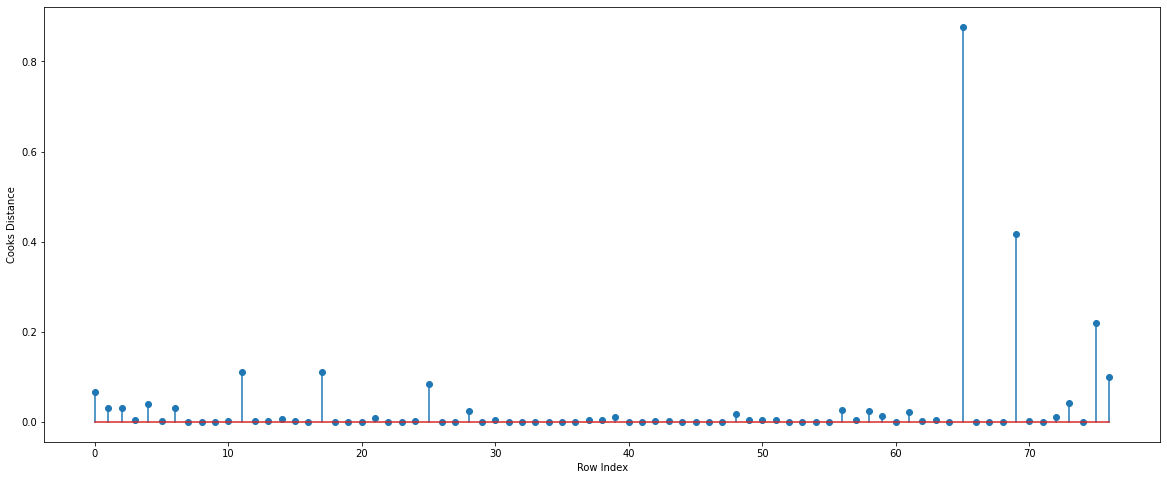

In [51]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,8))
plt.stem(np.arange(len(cars3)), np.round(c_v,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [53]:
#index and values of influencers where c is more than .5
(np.argmax(c_v), np.max(c_v))

(65, 0.8774556986296745)

Since the c_v is <1, we will stop diagnostics and build final model.

In [55]:
(final_ml_V.rsquared, final_ml_V.aic)

(0.8669636111859063, 409.4153062719508)

***Predicting a new data***

In [60]:
new_data = pd.DataFrame({"HP": 40, "VOL": 95, "SP": 102, "WT": 35}, index =[1])

In [61]:
new_data

,HP,VOL,SP,WT
1,40,95,102,35


In [62]:
final_data = pd.DataFrame({"MPG": final_ml_V.predict(new_data), "HP": 40, "VOL": 95, "SP": 102, "WT": 35}, index =[1])

In [63]:
final_data

,MPG,HP,VOL,SP,WT
1,46.035594,40,95,102,35
